**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
  - [Loading the datasets](#toc1_2_)    
- [Introduction to Sampling](#toc2_)    
  - [Random sampling from particular distributions](#toc2_1_)    
  - [Random sampling from a DataFrame](#toc2_2_)    
  - [Bias in sampling](#toc2_3_)    
- [Sampling methods](#toc3_)    
  - [Simple random sampling](#toc3_1_)    
  - [Systematic sampling](#toc3_2_)    
  - [Stratifed sampling](#toc3_3_)    
  - [Weighted random sampling](#toc3_4_)    
  - [Cluster sampling](#toc3_5_)    
- [Comparing sampling methods](#toc4_)    
  - [Creating the samples](#toc4_1_)    
  - [Calculating the point estimates](#toc4_2_)    
- [Creating sampling distributions](#toc5_)    
  - [Exact sampling distribution](#toc5_1_)    
  - [Generating approximate sampling distribution](#toc5_2_)    
- [Creating bootstrap distributions](#toc6_)    
  - [Comparing sampling and bootstrap distribution](#toc6_1_)    
- [Confidence intervals](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import itertools

### <a id='toc1_2_'></a>[Loading the datasets](#toc0_)

- The "spotify" dataset contains song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability.

In [4]:
spotify_population = pd.read_feather("./datasets/spotify_2000_2020.feather")

In [5]:
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [6]:
spotify_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41656 entries, 0 to 41655
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      41656 non-null  float64
 1   artists           41656 non-null  object 
 2   danceability      41656 non-null  float64
 3   duration_ms       41656 non-null  float64
 4   duration_minutes  41656 non-null  float64
 5   energy            41656 non-null  float64
 6   explicit          41656 non-null  float64
 7   id                41656 non-null  object 
 8   instrumentalness  41656 non-null  float64
 9   key               41656 non-null  float64
 10  liveness          41656 non-null  float64
 11  loudness          41656 non-null  float64
 12  mode              41656 non-null  float64
 13  name              41656 non-null  object 
 14  popularity        41656 non-null  float64
 15  release_date      41656 non-null  object 
 16  speechiness       41656 non-null  float6

- The "attrition" dataset is a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [7]:
attrition_pop = pd.read_feather("./datasets/attrition.feather")

In [8]:
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [9]:
attrition_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int32   
 1   Attrition                 1470 non-null   float64 
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int32   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int32   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   category
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int32   
 11  JobInvolvement            1470 non-null   category
 12  JobLevel                  1470 non-null   int32   
 13  JobRole                   1470 non-null   catego

- The "coffee" dataset contains rating data about various attributes of different coffee types.

In [10]:
coffee_pop = pd.read_feather("./datasets/coffee_ratings_full.feather")

In [11]:
coffee_pop.head(3)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [12]:
coffee_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1338 non-null   float64
 1   species                1338 non-null   object 
 2   owner                  1331 non-null   object 
 3   country_of_origin      1337 non-null   object 
 4   farm_name              979 non-null    object 
 5   lot_number             275 non-null    object 
 6   mill                   1023 non-null   object 
 7   ico_number             1187 non-null   object 
 8   company                1129 non-null   object 
 9   altitude               1112 non-null   object 
 10  region                 1279 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1338 non-null   float64
 13  bag_weight             1338 non-null   object 
 14  in_country_partner     1338 non-null   object 
 15  harv

## <a id='toc2_'></a>[Introduction to Sampling](#toc0_)

In [13]:
spotify_population.duration_minutes.describe()

count    41656.000000
mean         3.852152
std          1.505201
min          0.505017
25%          3.197333
50%          3.704883
75%          4.290450
max         90.058333
Name: duration_minutes, dtype: float64

`Box plots` are a great way to visualize descriptive statistics for a sample and spotting outliers.

<Axes: xlabel='duration_minutes'>

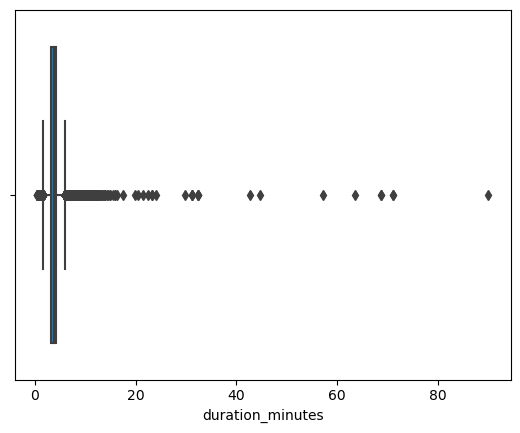

In [14]:
sns.boxplot(x=spotify_population.duration_minutes)

In [15]:
spotify_population.duration_minutes.quantile([0.95])

0.95    5.664833
Name: duration_minutes, dtype: float64

For now we won't do anything about the outliers.

In [16]:
spotify_population.shape

(41656, 20)

### <a id='toc2_1_'></a>[Random sampling from particular distributions](#toc0_)

**Docs: https://numpy.org/doc/stable/reference/random/generator.html#distributions**

Some of the common probability distributions we use for sampling are: *uniform, normal, binomial, and poisson* etc.

In [17]:
from numpy.random import default_rng

In [18]:
rng = default_rng()

In [19]:
rng.normal(loc=5, scale=2, size=100)

array([2.27724885, 4.25356536, 4.74835595, 3.94659839, 4.76428336,
       2.74339832, 5.22648624, 6.16662196, 7.42113235, 8.80265683,
       8.02078519, 7.43467345, 1.00014009, 6.26208025, 1.28781759,
       2.15879988, 7.97033037, 3.8904091 , 4.40124856, 8.11716576,
       3.72643713, 5.43590819, 2.08547357, 0.64758964, 5.26628725,
       2.76992018, 3.6659793 , 2.5938346 , 4.37838739, 2.68308105,
       7.79074604, 2.88121037, 5.09742976, 5.3812474 , 7.40402875,
       5.42656607, 9.02673078, 8.09265835, 8.38416941, 2.56630519,
       7.72409053, 5.03437575, 2.08147144, 1.08528705, 4.77982685,
       5.06405312, 9.79619039, 3.85573269, 4.01299619, 3.24803217,
       5.30147976, 6.16126018, 6.63095696, 4.16387213, 5.02611964,
       8.27207056, 3.64985475, 6.26030245, 2.64773087, 6.31260902,
       3.98437519, 4.48519008, 3.43429772, 2.71724216, 2.13916972,
       2.92902456, 8.12761264, 8.89188531, 7.36675988, 5.53472845,
       4.02083574, 3.67811837, 3.69866968, 5.93535195, 3.50466

- These random distributions that we generate are actually pseudo-random. We can reproduce the results by setting a random seed. Use, `numpy.random.default_rng(seed)` to set a random seed.

- `Histograms` come in very handy to visualize these generated distributions and confirm that they are indeed representative of the distributions we expect them to be.

### <a id='toc2_2_'></a>[Random sampling from a DataFrame](#toc0_)

- Use the `df.sample(n, frac, random_state)` method for simple random sampling

In [20]:
spotify_sample = spotify_population.sample(1000, random_state=7)

In [21]:
print(f"Population mean (Duration mins): {spotify_population.duration_minutes.mean()}")
print(f"Sample mean (Duration mins): {spotify_sample.duration_minutes.mean()}")

Population mean (Duration mins): 3.8521519140900073
Sample mean (Duration mins): 3.8641034333333333


### <a id='toc2_3_'></a>[Bias in sampling](#toc0_)

Non-probability sampling methods such as convenience sampling, judgement sampling, quota sampling, and snowball sampling are more likely to result in biased samples than probability sampling methods. 

- If you have data available for the entire population then `histograms` can be a very good way to verify that your sample is representative of the population.

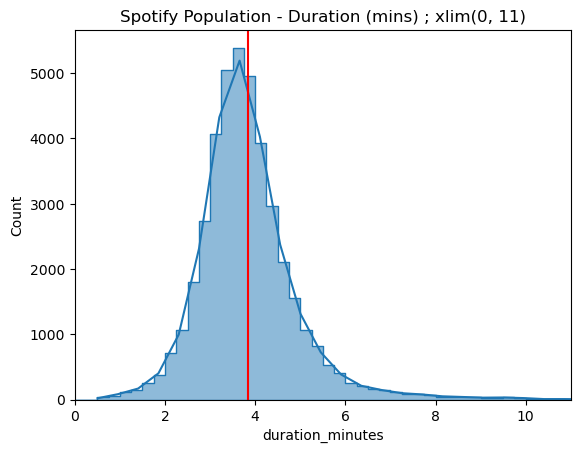

In [22]:
ax = sns.histplot(
    spotify_population.duration_minutes,
    element="step",
    bins=np.arange(0, 11, 0.25),
    kde=True,
)

ax.set(xlim=(0, 11), title="Spotify Population - Duration (mins) ; xlim(0, 11)")
# add a vertical line to draw attention to the mean
ax.axvline(x=spotify_population.duration_minutes.mean(), color="red")
plt.show()

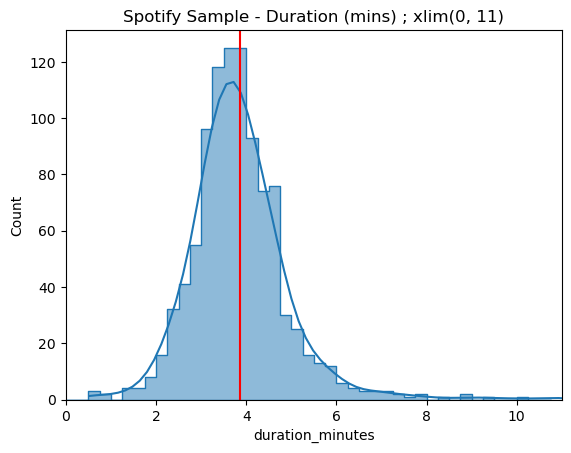

In [23]:
ax = sns.histplot(
    spotify_sample.duration_minutes,
    element="step",
    bins=np.arange(0, 11, 0.25),
    kde=True,
)
ax.set(xlim=(0, 11), title="Spotify Sample - Duration (mins) ; xlim(0, 11)")
# add a vertical line to draw attention to the mean
ax.axvline(x=spotify_sample.duration_minutes.mean(), color="red")
plt.show()

From the above histograms we can see that our sample represents the population fairly well.

## <a id='toc3_'></a>[Sampling methods](#toc0_)

### <a id='toc3_1_'></a>[Simple random sampling](#toc0_)

The most basic form of probability sampling is simple random sampling. In simple random sampling, each unit in the population has an equal chance of being selected in the sample.

We've already seen this type of sampling with the `df.sample(n, random_state)` function.

### <a id='toc3_2_'></a>[Systematic sampling](#toc0_)

Systematic sampling avoids randomness by selecting every "kth" unit in the population. For example, if we wanted a sample of 100 units from a population of 1000, we could select every 10th unit from the population.

Sometimes this is problematic if there is some underlying pattern in the population that is related to the sampling interval. Using a `scatterplot` can help us spot these patterns.

In [24]:
# set the sample size to 70
sample_size = 70

# calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# calculate the interval
interval = pop_size // sample_size

# systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

In [25]:
attrition_sys_samp.shape

(70, 31)

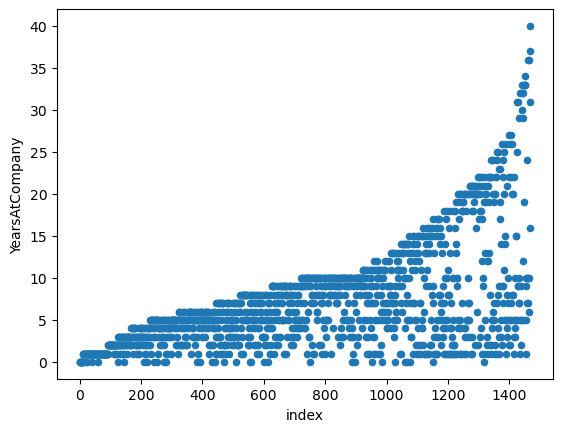

In [26]:
# adding an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# plotting YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot.scatter(x="index", y="YearsAtCompany")
plt.show()

`Shuffling` the data before sampling can help us avoid this problem. But then systematic sampling is equivalent to simple random sampling.

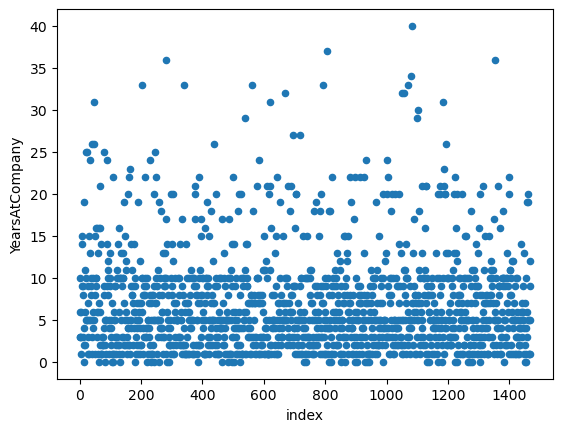

In [27]:
# shuffling the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# resetting the row indexes to monotonically increasing integers and creating an index column from it
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# plotting YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(kind="scatter", x="index", y="YearsAtCompany")
plt.show()

### <a id='toc3_3_'></a>[Stratifed sampling](#toc0_)

Stratified sampling is a probability sampling method in which the population is divided into non-overlapping groups called strata and a sample is randomly selected from each stratum.  It is equivalent to performing a simple random sample on each subgroup. This method is used to ensure that all subgroups of the population are represented in the sample.

- `Proportional stratified sampling:` The sample size from each stratum is proportional to the size of the stratum relative to the population. For example, if 40% of the population is in stratum A, then 40% of the sample will be from stratum A.

In [28]:
# proportion of employees by Education level
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True)

# print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [29]:
# proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education").sample(frac=0.4, random_state=2022)

# calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat["Education"].value_counts(normalize=True)

# print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


- `Equal stratified sampling:` The same number of units is sampled from each stratum. For example, if there are 1000 units in the population and 5 strata, then 200 units will be sampled from each stratum.

In [30]:
# 30 employees from each Education group
attrition_eq = attrition_pop.groupby("Education").sample(n=30, random_state=2022)

# get the proportions from attrition_eq
education_counts_eq = attrition_eq["Education"].value_counts(normalize=True)

# print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


### <a id='toc3_4_'></a>[Weighted random sampling](#toc0_)

A close relative of stratified sampling that provides even more flexibility is weighted random sampling. In this variant, we provide a column (i.e, series/list/df col name) of weights that adjust the relative probability of sampling each row.

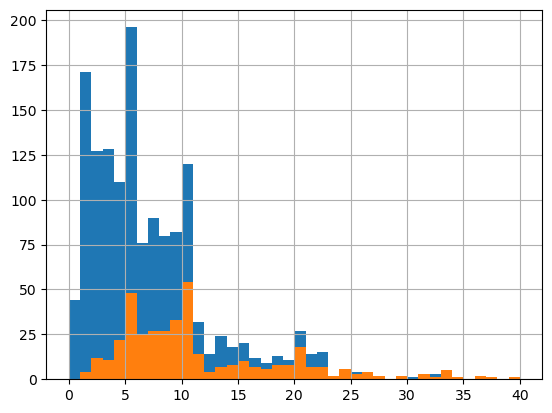

In [31]:
# plot YearsAtCompany from attrition_pop as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))

# sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# plot YearsAtCompany from attrition_weight as a histogram
attrition_weight["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))

plt.show()

In [32]:
print(f"Population mean: {attrition_pop.YearsAtCompany.mean()}")
print(f"Weighted sample mean: {attrition_weight.YearsAtCompany.mean()}")

Population mean: 7.0081632653061225
Weighted sample mean: 11.1525


The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

### <a id='toc3_5_'></a>[Cluster sampling](#toc0_)

Cluster sampling is a `two-stage sampling` technique that is closely related to stratified sampling. *First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.*

Most of the times we choose cluster sampling due to cost constraints. For example, when collecting an overall sample requires lots of travel from one group to another to collect samples within each group.

In [33]:
# setting a seed for reproducibility
from numpy.random import default_rng

rng = default_rng(seed=197)

In [34]:
# create a list of unique JobRole values
job_roles_pop = list(attrition_pop["JobRole"].unique())

# randomly sample four JobRole values
job_roles_samp = rng.choice(job_roles_pop, size=4, replace=False)

# filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop["JobRole"].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

In [35]:
job_roles_samp

array(['Healthcare_Representative', 'Manufacturing_Director',
       'Research_Director', 'Manager'], dtype='<U25')

In [36]:
# since the "JobRole" column is category type and we only include 4 roles in our filtered dataset,
# categories outside of these 4 classes will be present as categorical values but won't be used
attrition_filtered["JobRole"].value_counts()

JobRole
Manufacturing_Director       145
Healthcare_Representative    131
Manager                      102
Research_Director             80
Human_Resources                0
Laboratory_Technician          0
Research_Scientist             0
Sales_Executive                0
Sales_Representative           0
Name: count, dtype: int64

In [37]:
# remove categories with no rows
attrition_filtered["JobRole"] = attrition_filtered[
    "JobRole"
].cat.remove_unused_categories()

# randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(n=5, random_state=2022)

In [38]:
# print the sample
attrition_clust.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
812,31,0.0,Travel_Rarely,616,Research_Development,12,Bachelor,Medical,Very_High,Female,...,Excellent,High,2,10,2,Bad,9,7,8,5
1190,38,0.0,Travel_Rarely,1495,Research_Development,10,Bachelor,Medical,High,Female,...,Excellent,High,1,18,4,Better,1,0,0,0
378,33,0.0,Travel_Rarely,1069,Research_Development,1,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Low,0,6,3,Better,5,0,1,4
920,35,0.0,Travel_Frequently,1199,Research_Development,18,Master,Life_Sciences,High,Male,...,Excellent,Very_High,2,10,2,Best,10,2,0,2
917,33,0.0,Travel_Rarely,501,Research_Development,15,College,Medical,Medium,Female,...,Excellent,Low,1,10,6,Better,9,7,8,1


## <a id='toc4_'></a>[Comparing sampling methods](#toc0_)

We're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, we'll have to set up the samples.

We'll use the *RelationshipSatisfaction* column of the *attrition_pop* dataset, which categorizes the employee's relationship with the company. It has four levels: *Low, Medium, High, and Very_High*.

### <a id='toc4_1_'></a>[Creating the samples](#toc0_)

`->` *Simple random sampling*

In [39]:
# perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

`->` *Stratified sampling*

In [40]:
# perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction").sample(frac=0.25)

`->` *Cluster sampling* 

In [41]:
# create a list of unique RelationshipSatisfaction values
satisfaction_unique = attrition_pop["RelationshipSatisfaction"].unique().to_list()

In [42]:
# randomly sample 2 unique satisfaction values
satisfaction_samp = rng.choice(satisfaction_unique, size=2, replace=False)

In [43]:
# filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep["RelationshipSatisfaction"] = attrition_clust_prep[
    "RelationshipSatisfaction"
].cat.remove_unused_categories()

# perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(
    n=len(attrition_pop) // 8, random_state=2022
)

### <a id='toc4_2_'></a>[Calculating the point estimates](#toc0_)

Now that we have three types of sample (simple, stratified, and cluster), we can compare point estimates from each sample to the population parameter. That is, we can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, we'll calculate the proportion of employees who left the company (they have an *Attrition* value of 1) for each category of *RelationshipSatisfaction*.

`->` Population point estimate

In [44]:
# mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction")[
    "Attrition"
].mean()

# print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


`->` *SRS sample estimate*


In [45]:
# calculate the same thing for the simple random sample
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction")[
    "Attrition"
].mean()

# print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


`->` *Strat sample estimate*

In [46]:
# calculate the same thing for the stratified sample
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction")[
    "Attrition"
].mean()

# print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.130435
Medium       0.131579
High         0.130435
Very_High    0.194444
Name: Attrition, dtype: float64


`->` *Cluster sample estimate*

In [47]:
# calculate the same thing for the cluster sample
mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction")[
    "Attrition"
].mean()

# print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low     0.213115
High    0.125683
Name: Attrition, dtype: float64


## <a id='toc5_'></a>[Creating sampling distributions](#toc0_)

**The distribution of a sample statistic is called a sampling distribution.**

Sampling distributions are the distributions of summary statistics calculated from samples.

 Sampling distributions tends to be normally distributed and with increasing sample size the distribution becomes more and more representative of the bell curve.

When we calculate a point estimate such as a sample mean, the calculated value depends on the rows that were included in the sample. It means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, we can create many samples and calculate the sample mean (or another statistic) for each sample. This is the main idea behind sampling distributions.

***By generating the sample statistic many times with different samples, we can quantify the amount of variation in those statistics.***

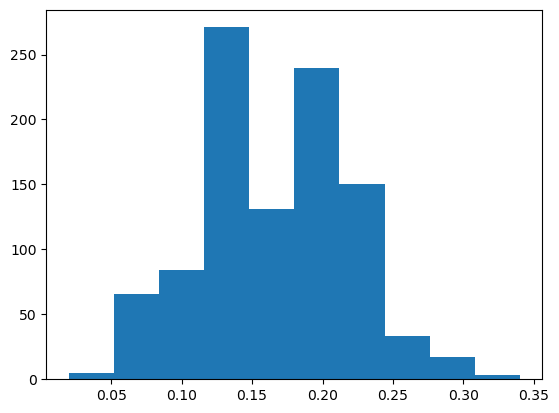

In [48]:
# create an empty list
mean_attritions = []
# loop 1000 times to create 500 sample means
for i in range(1000):
    mean_attritions.append(attrition_pop.sample(n=50)["Attrition"].mean())

# create a histogram of the 500 sample means
plt.hist(mean_attritions)
plt.show()

### <a id='toc5_1_'></a>[Exact sampling distribution](#toc0_)

An exact sampling distribution is a probability distribution of a statistic obtained from all possible samples of a fixed size drawn from a population.

To calculate the exact sampling distribution of a statistic, we would need to calculate the statistic for all possible samples of a fixed size drawn from the population.

Let's take a look at the sampling distribution of dice rolls. We'll look at five eight-sided dice. (These have the numbers one to eight.)

In [49]:
# to create a dataframe from every combination of some given values
# we can create a dict where the keys are column names and the values are lists of the data values
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [50]:
# expand a grid representing 5 8-sided dice
op = list(np.arange(1, 9))

dice = expand_grid({"die1": op, "die2": op, "die3": op, "die4": op, "die5": op})

In [51]:
# add a column of mean rolls and convert to a categorical
dice["mean_roll"] = dice.mean(axis=1)
dice["mean_roll"] = dice["mean_roll"].astype("category")

In [52]:
dice

,die1,die2,die3,die4,die5,mean_roll
0,1,1,1,1,1,1.0
1,1,1,1,1,2,1.2
2,1,1,1,1,3,1.4
3,1,1,1,1,4,1.6
4,1,1,1,1,5,1.8
...,...,...,...,...,...,...
32763,8,8,8,8,4,7.2
32764,8,8,8,8,5,7.4
32765,8,8,8,8,6,7.6
32766,8,8,8,8,7,7.8


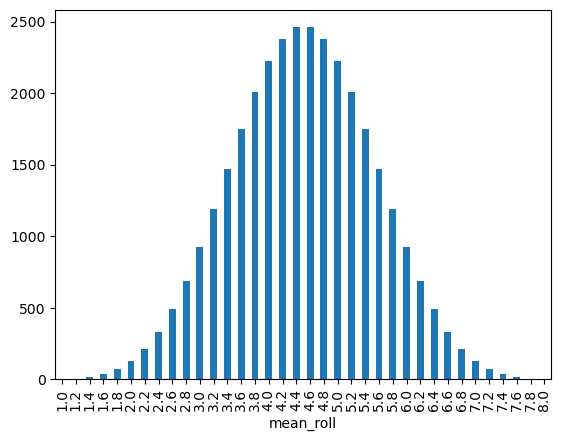

In [53]:
# plot a barplot to show the distribution
# not a histogram since mean_roll is a discrete random variable
dice["mean_roll"].value_counts(sort=False).plot(kind="bar")
plt.show()

### <a id='toc5_2_'></a>[Generating approximate sampling distribution](#toc0_)

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, we can calculate an *approximate sampling distribution* **by simulating** the exact sampling distribution. That is, we can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

For instance, let's simulate rolling five eight-sided dice at once. We'll take the mean of each roll, and repeat this process 1000 times. This will give us an approximate sampling distribution of the mean of five eight-sided dice.

In [54]:
# rolling five eight-sided dice at once
roll_five_die = rng.choice(list(range(1, 9)), size=5, replace=True)

In [55]:
print(roll_five_die)
print(roll_five_die.mean())

[4 8 1 8 7]
5.6


In [56]:
# replicate the sampling code 1000 times
sample_means_1000 = []
for _ in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

In [57]:
# first 10 entries of the result
sample_means_1000[:10]

[3.6, 6.4, 4.4, 3.6, 4.2, 4.6, 4.2, 5.0, 4.0, 5.0]

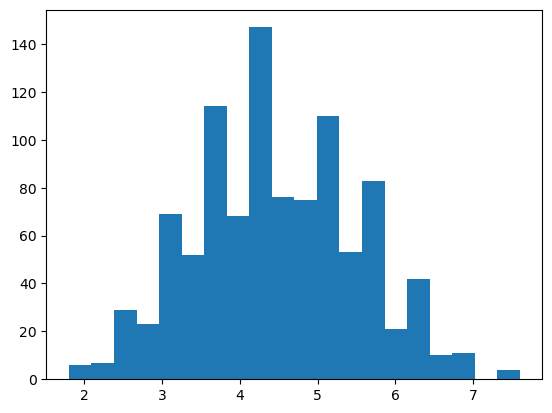

In [58]:
# draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

## <a id='toc6_'></a>[Creating bootstrap distributions](#toc0_)

Bootstrapping is a statistical method that can be used to estimate the sampling distribution of almost any statistic. It is a non-parametric method, which means that it does not make any assumptions about the shape of the population distribution.

Bootstrapping is also known as resampling. For bootstrapping each row in the dataset should have an equal probability of being selected. 

Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population. 

The key to deciding whether to sample with replacement (bootstrapping) or without replacement (simple sampling) is whether or not your dataset is best thought of as being the whole population or not.


Creating a bootstrap distribution is very similar to creating a sampling distribution. The only difference is the first step. Instead of sampling without replacement, we sample with replacement. We can use the `df.sample(n, frac, replace=True)` method to sample with replacement. After that we calculate the statistic of interest for each sample to create the bootstrap distribution.

In [59]:
spotify_sample = spotify_population.sample(frac=0.7, random_state=236)

In [60]:
# replicating sampling with replacement and calculating the mean of each sample 1000 times to create the
# bootstrap distribution "mean_danceability_1000"
mean_danceability_1000 = []
for _ in range(1000):
    mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)["danceability"])
    )

In [61]:
# print the result
print(mean_danceability_1000[:20])

[0.5904542371137556, 0.5921883363627011, 0.5918560101512398, 0.5900616859288728, 0.5902611475016291, 0.590512723344422, 0.5903418670050413, 0.590537823656504, 0.5905720978085668, 0.5911517747522206, 0.5896066806131898, 0.5903233341335437, 0.5900012414691862, 0.5896130731506568, 0.590278143969272, 0.5907214582118729, 0.5899977982784046, 0.5909675468980418, 0.5906336671353614, 0.5913207483109845]


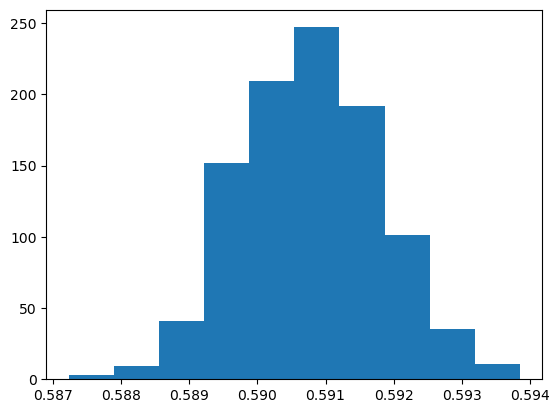

In [62]:
# drawing a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

### <a id='toc6_1_'></a>[Comparing sampling and bootstrap distribution](#toc0_)

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic we are interested in is the mean popularity score of the songs.

- Generating a sampling distribution

In [63]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for _ in range(2000):
    mean_popularity_2000_samp.append(
        # Sample 500 rows and calculate the mean popularity
        spotify_population.sample(n=500).popularity.mean()
    )

In [64]:
# print the sampling distribution results
print(mean_popularity_2000_samp[:100])

[54.134, 53.75, 55.27, 55.124, 54.804, 54.2, 55.196, 54.856, 54.656, 54.14, 54.05, 55.766, 55.232, 54.322, 55.654, 55.028, 54.186, 54.164, 53.712, 53.778, 54.026, 54.882, 55.934, 54.662, 54.946, 53.424, 55.742, 54.856, 55.054, 55.274, 55.168, 55.19, 55.536, 55.344, 54.256, 54.396, 55.184, 55.232, 54.034, 54.098, 54.824, 55.054, 55.558, 54.806, 54.982, 55.466, 54.886, 54.592, 54.422, 54.838, 54.304, 54.692, 55.128, 54.6, 55.344, 54.504, 54.35, 53.866, 55.188, 54.942, 54.738, 53.982, 54.518, 54.97, 54.776, 54.922, 54.086, 55.582, 54.004, 55.12, 54.692, 55.276, 55.51, 53.774, 55.482, 54.49, 55.242, 54.186, 54.294, 54.282, 54.266, 55.668, 55.312, 55.238, 54.904, 55.642, 54.104, 55.438, 55.462, 54.594, 55.064, 54.426, 54.98, 54.614, 55.318, 54.834, 54.39, 55.04, 55.398, 54.704]


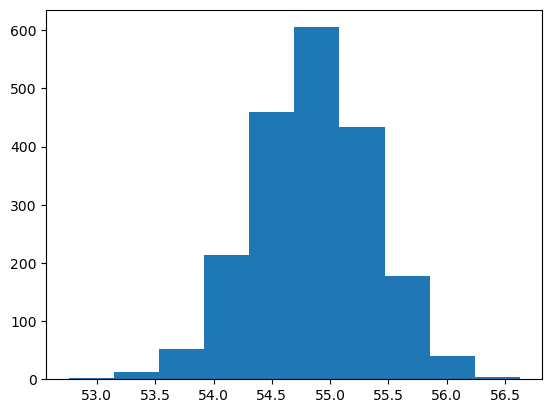

In [65]:
# drawing a histogram
plt.hist(mean_popularity_2000_samp)
plt.show()

- Generating a bootstrap distribution

In [66]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for _ in range(2000):
    mean_popularity_2000_boot.append(
        # Resample 500 rows and calculate the mean popularity
        spotify_sample.sample(n=500, replace=True).popularity.mean()
    )

In [67]:
# print the bootstrap distribution results
print(mean_popularity_2000_boot[:100])

[54.404, 55.244, 54.458, 55.03, 55.422, 55.066, 54.77, 55.038, 55.318, 54.83, 55.554, 54.842, 54.742, 55.416, 55.53, 54.73, 55.188, 54.894, 55.782, 54.818, 55.352, 54.282, 54.47, 54.736, 54.982, 55.76, 54.582, 55.286, 55.358, 54.536, 55.764, 54.464, 55.098, 54.48, 53.894, 53.934, 54.958, 54.804, 54.876, 55.532, 54.686, 54.938, 54.284, 54.568, 54.804, 54.49, 54.588, 55.548, 55.27, 55.072, 55.534, 55.322, 54.934, 54.39, 55.38, 54.74, 55.782, 55.336, 54.766, 54.64, 54.75, 55.052, 55.05, 54.664, 53.508, 54.87, 54.7, 54.79, 54.88, 54.936, 54.928, 55.184, 54.128, 54.662, 55.126, 55.046, 54.312, 55.012, 54.638, 54.228, 55.378, 55.672, 55.036, 54.704, 54.684, 55.046, 54.238, 54.95, 55.144, 55.142, 55.388, 54.536, 55.924, 55.694, 55.302, 54.83, 55.22, 54.922, 54.708, 53.646]


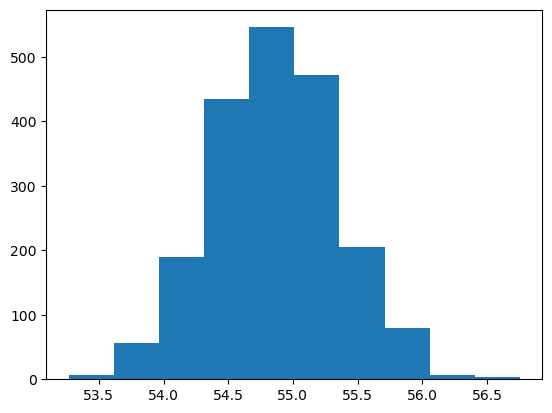

In [68]:
# drawing a histogram
plt.hist(mean_popularity_2000_boot)
plt.show()

- Comparing the two distributions on mean popularity score

In [69]:
# calculate the population mean popularity
pop_mean = spotify_population.popularity.mean()

# calculate the original sample mean popularity
samp_mean = spotify_sample.popularity.mean()

# calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

In [70]:
# print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.850577866181965, 54.85103599999999, 54.86076]


The sampling distribution mean is the best estimate of population mean and the bootstrap distribution mean is closer to the sample mean it was generated from.

- Comparing the two distributions on standard deviation of popularity score 

In [71]:
# calculate the population std dev popularity
pop_sd = spotify_population.popularity.std(ddof=0)

# calculate the original sample std dev popularity
samp_sd = spotify_sample.popularity.std()

# calculate the sampling dist'n estimate of std dev popularity (SD_pop = SE * sqrt(n))
samp_distn_sd = np.std(mean_popularity_2000_samp) * np.sqrt(500)

# calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot) * np.sqrt(500)

In [72]:
# print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.906715504447883, 11.224318124144558, 10.806322279110502]


**`Caution:`** If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.

## <a id='toc7_'></a>[Confidence intervals](#toc0_)

Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.

- Calculating confidence intervals using quantiles

In [73]:
# Generate a 95% confidence interval using the quantile method
lower_quant = pd.Series(mean_popularity_2000_boot).quantile(0.025)
upper_quant = pd.Series(mean_popularity_2000_boot).quantile(0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.927899999999994, 55.81205)


- Calculating confidence intervals using standard errors

In [74]:
from scipy.stats import norm

In [75]:
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_boot)
standard_error = np.std(mean_popularity_2000_boot, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(53.91332460569914, 55.80819539430086)
